In [207]:
# imports
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [208]:
import sqlite3

conn = sqlite3.connect('PGATourData_13_23.db')

cursor = conn.cursor()

df = pd.read_sql_query('SELECT * FROM pgatour_data', conn)

df.head()

,YEAR,PLAYER,ROUNDS,COUNTRY,SG:_TOTAL,SG:_TEE_TO_GREEN,SG:_OFF_THE_TEE,SG:_APPROACH_THE_GREEN,SG:_AROUND_THE_GREEN,SG:_PUTTING,...,ONE_PUTT_PERCENTAGE,BIRDIE_OR_BETTER_CONVERSION_PERCENTAGE,SCORING_AVERAGE_(ACTUAL),BIRDIE_AVERAGE,PAR_3_SCORING_AVERAGE,PAR_4_SCORING_AVERAGE,PAR_5_SCORING_AVERAGE,TOP_10_FINISHES,OFFICIAL_MONEY,FEDEXCUP_REGULAR_SEASON_POINTS
0,2014,Rory McIlroy,48.0,Northern Ireland,2.266,1.992,1.367,0.602,0.022,0.274,...,41.75,36.84,69.27,4.58,3.03,3.94,4.55,12.0,8280096.0,2582.0
1,2014,Sergio Garcia,40.0,Spain,1.984,1.818,0.382,1.150,0.286,0.167,...,40.61,29.97,69.38,3.86,2.95,3.96,4.65,10.0,4939606.0,1700.0
2,2014,Jim Furyk,66.0,United States,1.796,1.705,0.121,1.175,0.408,0.091,...,39.10,26.65,69.79,3.44,3.01,3.98,4.63,11.0,5987395.0,1851.0
3,2014,Adam Scott,56.0,Australia,1.720,1.500,0.725,0.610,0.166,0.220,...,40.44,33.89,69.49,4.24,3.10,3.97,4.48,10.0,4098588.0,1479.0
4,2014,Matt Kuchar,76.0,United States,1.573,1.117,0.210,0.527,0.380,0.457,...,39.96,30.57,69.77,3.82,3.04,3.97,4.65,11.0,4695515.0,1921.0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   YEAR                                     1527 non-null   int64  
 1   PLAYER                                   1527 non-null   object 
 2   ROUNDS                                   1527 non-null   float64
 3   COUNTRY                                  1527 non-null   object 
 4   SG:_TOTAL                                1527 non-null   float64
 5   SG:_TEE_TO_GREEN                         1527 non-null   float64
 6   SG:_OFF_THE_TEE                          1527 non-null   float64
 7   SG:_APPROACH_THE_GREEN                   1527 non-null   float64
 8   SG:_AROUND_THE_GREEN                     1527 non-null   float64
 9   SG:_PUTTING                              1527 non-null   float64
 10  DRIVING_DISTANCE                         1527 no

In [210]:
df2 = df.drop(columns=['YEAR','PLAYER','COUNTRY','FEDEXCUP_REGULAR_SEASON_POINTS','TOP_10_FINISHES', 'ROUNDS'], axis=1)
# df2['OFFICIAL_MONEY'] = df2['OFFICIAL_MONEY'] / 1000

# df2['EARNINGS_PER_ROUND'] = df2['OFFICIAL_MONEY'] / df2['ROUNDS']

# df2 = df2.drop(columns=['OFFICIAL_MONEY', 'ROUNDS'], axis=1)

df2.head()

,SG:_TOTAL,SG:_TEE_TO_GREEN,SG:_OFF_THE_TEE,SG:_APPROACH_THE_GREEN,SG:_AROUND_THE_GREEN,SG:_PUTTING,DRIVING_DISTANCE,DRIVING_ACCURACY_PERCENTAGE,CLUB_HEAD_SPEED,BALL_SPEED,...,AVERAGE_DISTANCE_TO_HOLE_AFTER_TEE_SHOT,PUTTING_AVERAGE,ONE_PUTT_PERCENTAGE,BIRDIE_OR_BETTER_CONVERSION_PERCENTAGE,SCORING_AVERAGE_(ACTUAL),BIRDIE_AVERAGE,PAR_3_SCORING_AVERAGE,PAR_4_SCORING_AVERAGE,PAR_5_SCORING_AVERAGE,OFFICIAL_MONEY
0,2.266,1.992,1.367,0.602,0.022,0.274,310.5,59.93,121.56,179.73,...,162.4,1.708,41.75,36.84,69.27,4.58,3.03,3.94,4.55,8280096.0
1,1.984,1.818,0.382,1.150,0.286,0.167,294.3,62.19,119.83,174.72,...,172.9,1.750,40.61,29.97,69.38,3.86,2.95,3.96,4.65,4939606.0
2,1.796,1.705,0.121,1.175,0.408,0.091,279.3,73.18,110.26,162.78,...,188.0,1.787,39.10,26.65,69.79,3.44,3.01,3.98,4.63,5987395.0
3,1.720,1.500,0.725,0.610,0.166,0.220,303.5,61.51,119.58,177.26,...,167.4,1.732,40.44,33.89,69.49,4.24,3.10,3.97,4.48,4098588.0
4,1.573,1.117,0.210,0.527,0.380,0.457,283.8,67.37,108.92,161.68,...,177.4,1.755,39.96,30.57,69.77,3.82,3.04,3.97,4.65,4695515.0


In [211]:
train_df, test_df = train_test_split(df2, test_size=0.2, random_state=42)

<Axes: >

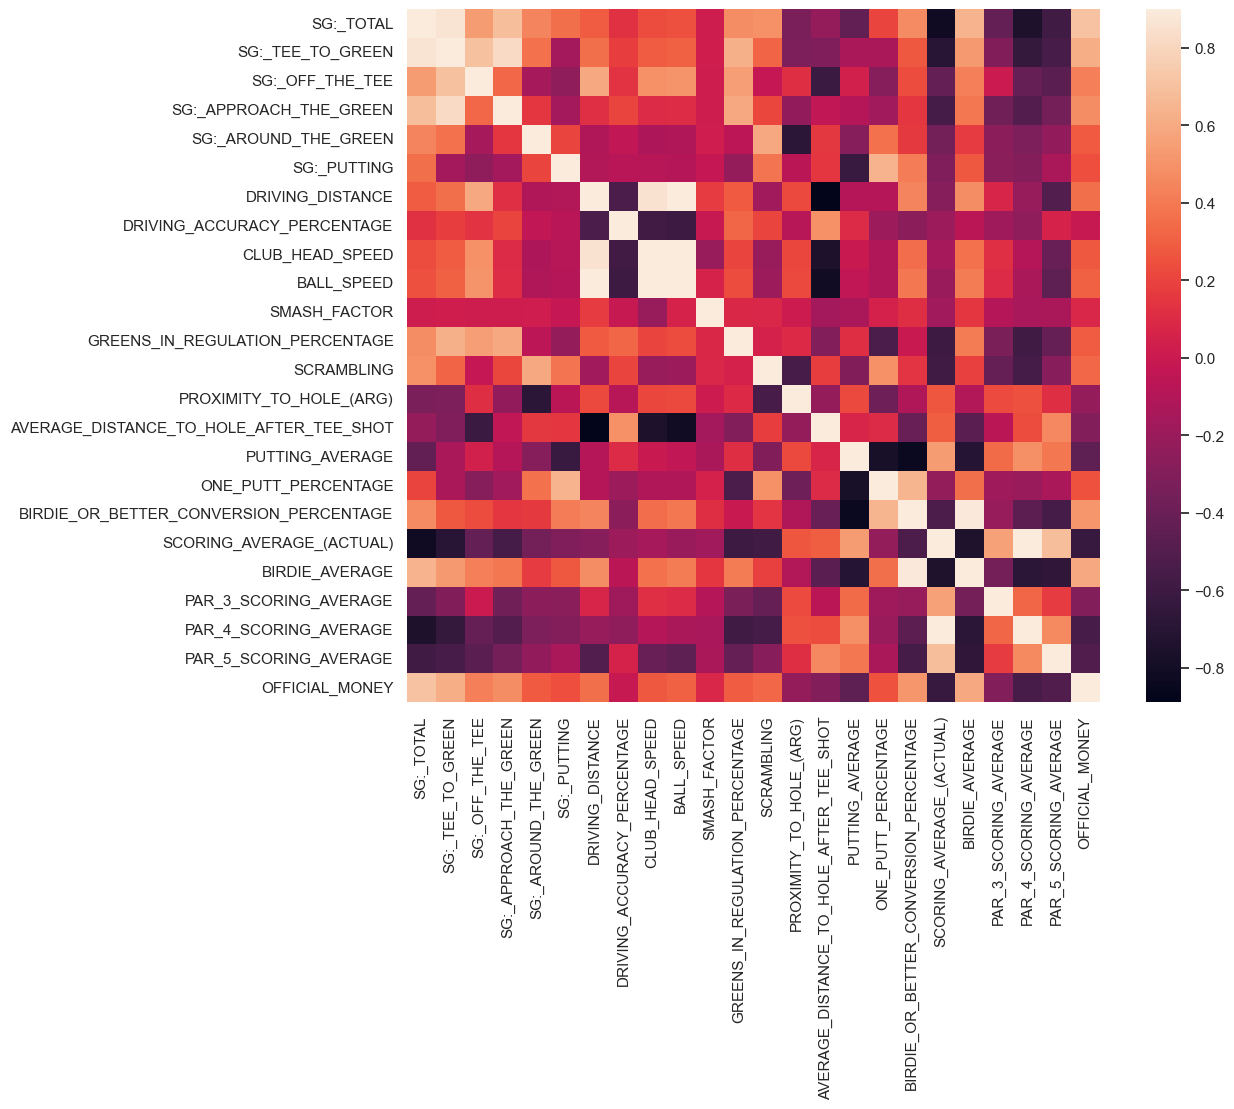

In [212]:
corr_matrix = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

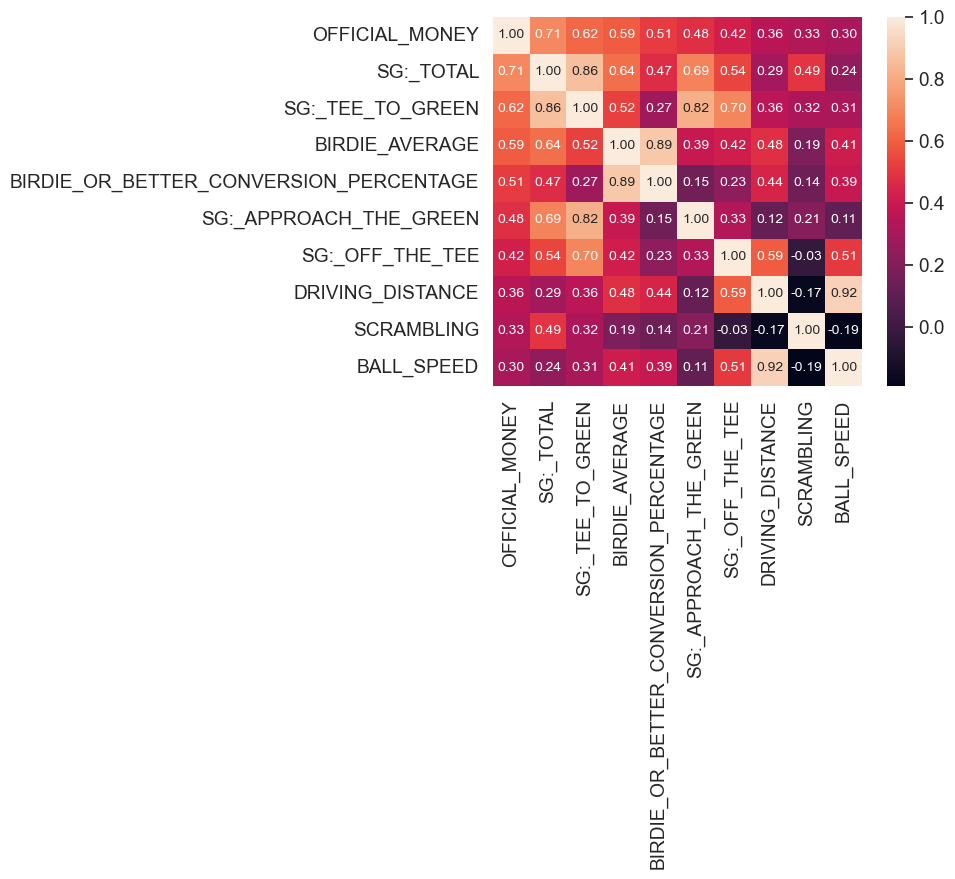

In [213]:
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'OFFICIAL_MONEY')['OFFICIAL_MONEY'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- The variable with the highest correlation with 'Official Money' is 'SG: Total' (total strokes gained) -- *Retain 'SG: Total'*
- High correlation between 'Birdie or Better Conversion Percentage' and 'Birdie Average'. 'Birdie Average' has higher correlation with 'Official Money' -- *Retain 'Birdie Average', Remove 'Birdie or Better Conversion Percentage'*
- High correlation between 'SG: Tee-to-Green' and 'SG: Total'. 'SG: Total' has higher correlation with 'Official Money' -- *Retain 'SG: Total', Remove 'SG: Tee-to-Green'*
- High correlation between 'Driving Distance' and 'Ball Speed'. 'Driving Distance' has higher correlation with 'Official Money' -- *Retain 'Driving Distance', Remove 'Ball Speed'*
- *Retain 'Scrambling', 'SG: Off-the-Tee', and 'SG: Approach-the-Green'* as we did not see correlation with any other variable but it has a significant association with ‘Official Money’

/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

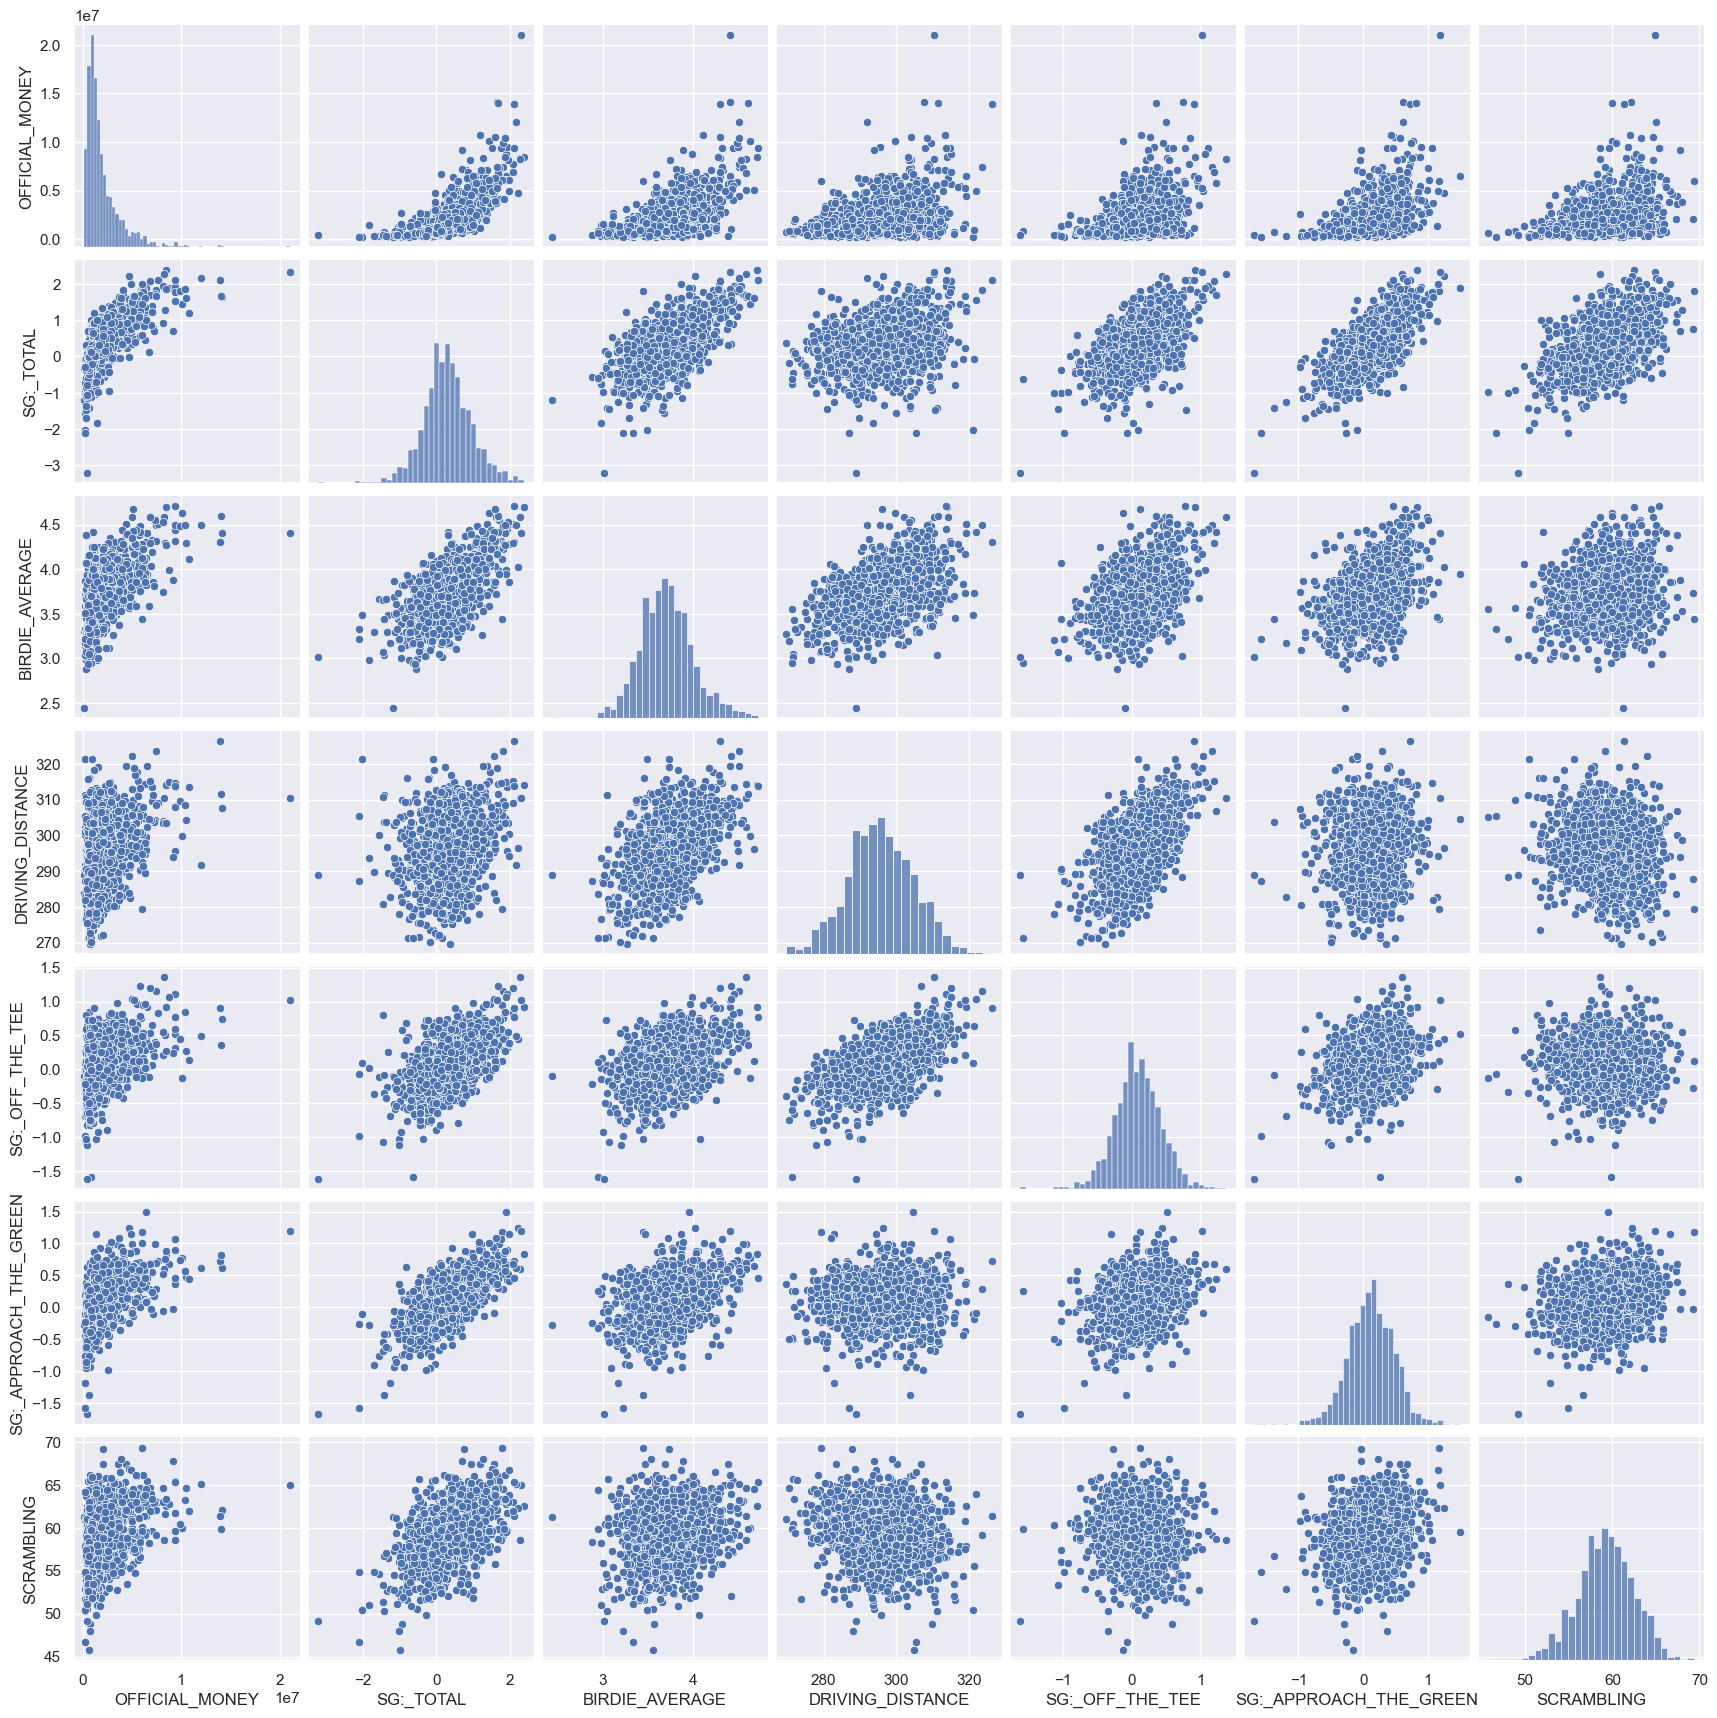

In [215]:
#scatterplot for selected columns (defined in cols)
sns.set()
cols = ['OFFICIAL_MONEY', 'SG:_TOTAL', 'BIRDIE_AVERAGE', 'DRIVING_DISTANCE' ,'SG:_OFF_THE_TEE', 'SG:_APPROACH_THE_GREEN', 'SCRAMBLING']
sns.pairplot(train_df[cols], height=2.5)
plt.show();

In [216]:
train_df = train_df.drop(train_df[(train_df['SG:_TOTAL']<-2.2) & (train_df['OFFICIAL_MONEY']<0.3e7)].index)
train_df = train_df.drop(train_df[(train_df['BIRDIE_AVERAGE']<2.7) & (train_df['OFFICIAL_MONEY']<0.3e7)].index)
train_df = train_df.drop(train_df[(train_df['SG:_TOTAL']>1.5) & (train_df['OFFICIAL_MONEY']>1.2e7)].index)
train_df = train_df.drop(train_df[(train_df['SG:_APPROACH_THE_GREEN']<-0.95) & (train_df['OFFICIAL_MONEY']<0.2e7)].index)

/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

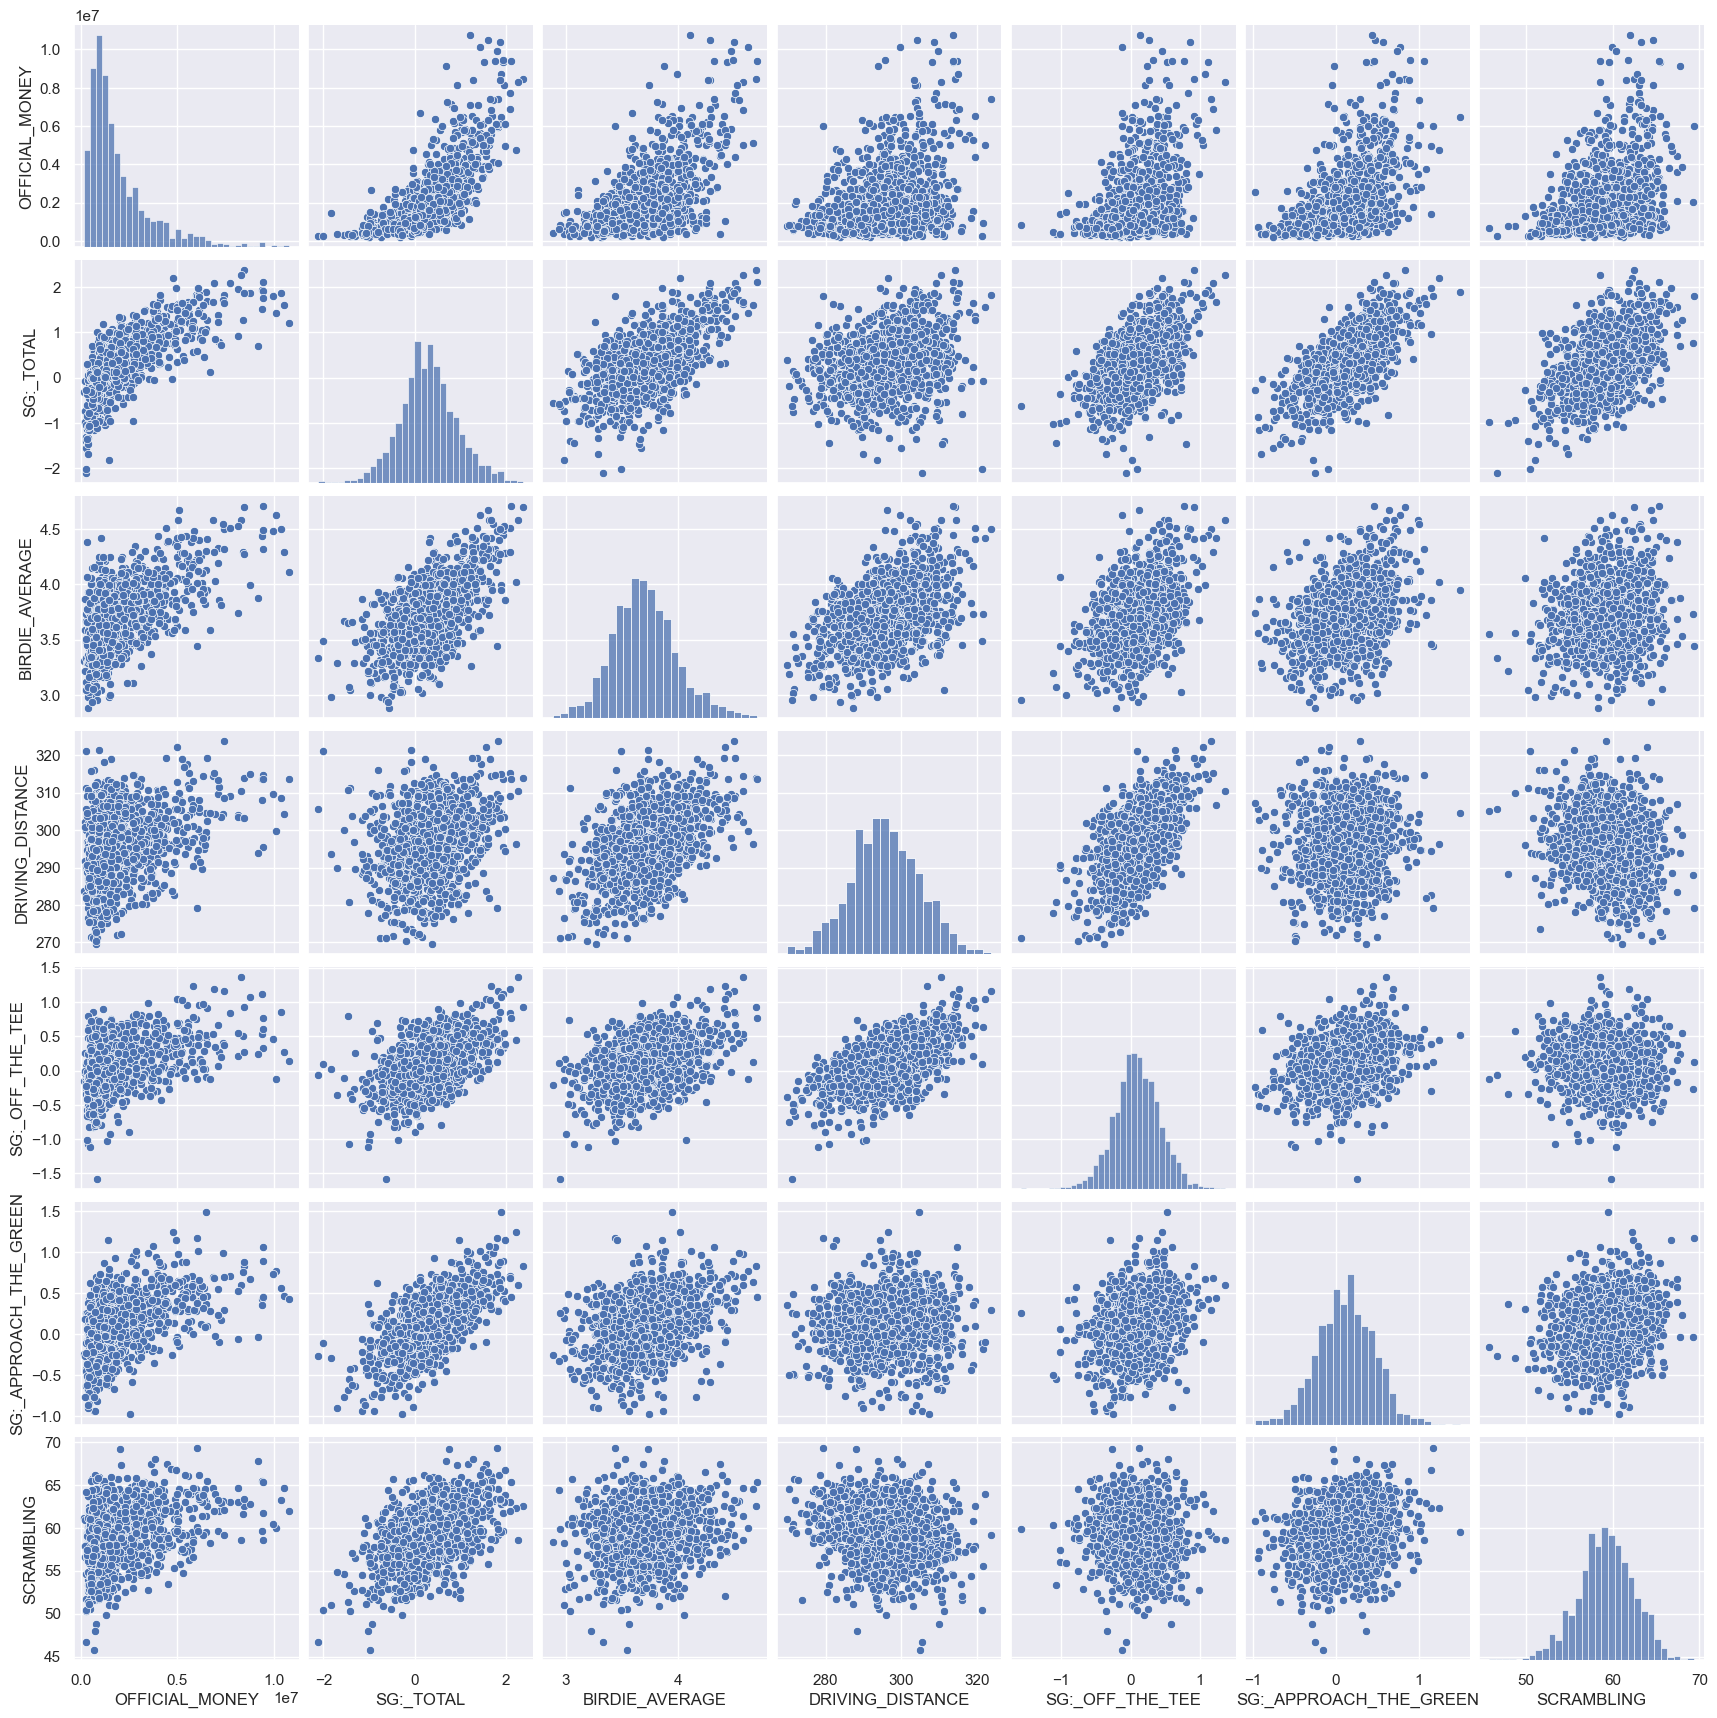

In [217]:
#scatterplot for selected columns (defined in cols)
sns.set()
cols = ['OFFICIAL_MONEY', 'SG:_TOTAL', 'BIRDIE_AVERAGE', 'DRIVING_DISTANCE' ,'SG:_OFF_THE_TEE', 'SG:_APPROACH_THE_GREEN', 'SCRAMBLING']
sns.pairplot(train_df[cols], height=2.5)
plt.show();

/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


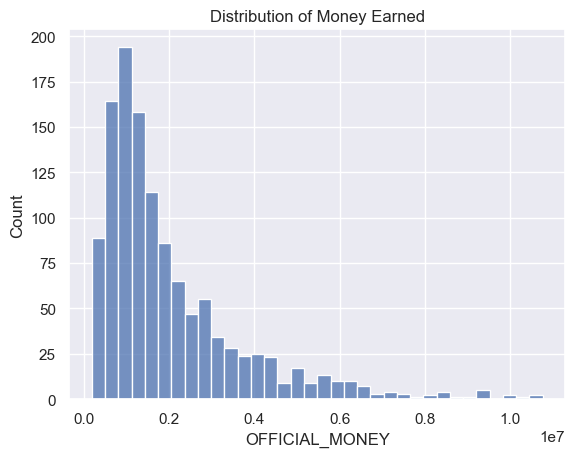

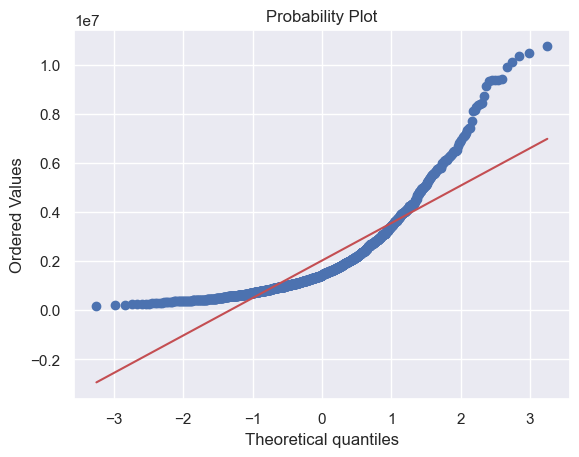

In [218]:
sns.histplot(train_df['OFFICIAL_MONEY']).set_title("Distribution of Money Earned")

# probability plot
fig = plt.figure()
res = stats.probplot(train_df['OFFICIAL_MONEY'], plot=plt)


 mean = 14.23 and std dev = 0.76



/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_29405/2188563692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['OFFICIAL_MONEY'] , fit=norm);
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


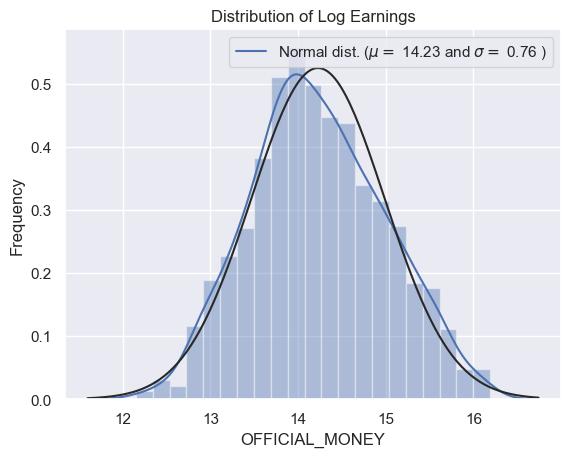

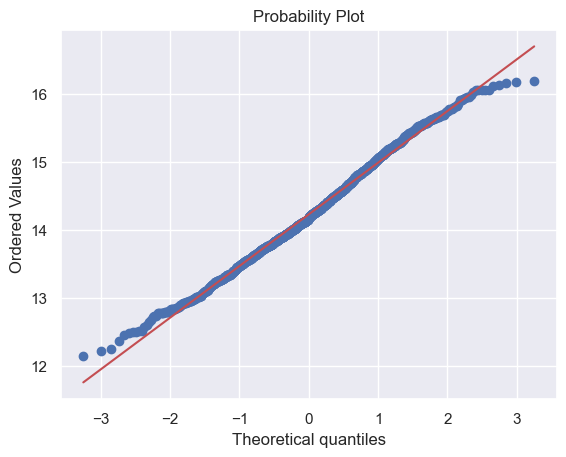

In [219]:
from scipy.stats import norm, probplot

#Using the log1p function applies log(1+x) to all elements of the column
train_df["OFFICIAL_MONEY"] = np.log1p(train_df["OFFICIAL_MONEY"])
test_df["OFFICIAL_MONEY"] = np.log1p(test_df["OFFICIAL_MONEY"])

#Check the new distribution after log transformation 
sns.distplot(train_df['OFFICIAL_MONEY'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['OFFICIAL_MONEY'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log Earnings')

#Also the QQ plot
fig = plt.figure()
res = probplot(train_df['OFFICIAL_MONEY'], plot=plt)
plt.show()

In [220]:
df2.columns

Index(['SG:_TOTAL', 'SG:_TEE_TO_GREEN', 'SG:_OFF_THE_TEE',
       'SG:_APPROACH_THE_GREEN', 'SG:_AROUND_THE_GREEN', 'SG:_PUTTING',
       'DRIVING_DISTANCE', 'DRIVING_ACCURACY_PERCENTAGE', 'CLUB_HEAD_SPEED',
       'BALL_SPEED', 'SMASH_FACTOR', 'GREENS_IN_REGULATION_PERCENTAGE',
       'SCRAMBLING', 'PROXIMITY_TO_HOLE_(ARG)',
       'AVERAGE_DISTANCE_TO_HOLE_AFTER_TEE_SHOT', 'PUTTING_AVERAGE',
       'ONE_PUTT_PERCENTAGE', 'BIRDIE_OR_BETTER_CONVERSION_PERCENTAGE',
       'SCORING_AVERAGE_(ACTUAL)', 'BIRDIE_AVERAGE', 'PAR_3_SCORING_AVERAGE',
       'PAR_4_SCORING_AVERAGE', 'PAR_5_SCORING_AVERAGE', 'OFFICIAL_MONEY'],
      dtype='object')

In [221]:
cols = ['SG:_TOTAL', 'SG:_OFF_THE_TEE',
       'SG:_APPROACH_THE_GREEN',
       'DRIVING_DISTANCE',
       'SCRAMBLING',
       'BIRDIE_AVERAGE']

X_train = train_df[cols]
y_train = train_df['OFFICIAL_MONEY']

In [222]:
X_test = test_df[['SG:_TOTAL', 'SG:_OFF_THE_TEE',
       'SG:_APPROACH_THE_GREEN',
       'DRIVING_DISTANCE',
       'SCRAMBLING',
       'BIRDIE_AVERAGE']]
y_test = test_df['OFFICIAL_MONEY']

In [223]:
lr = LinearRegression()

In [224]:
lr.fit(X_train, y_train)

LinearRegression()

In [225]:
lr.score(X_train, y_train)

0.6105553337460443

In [226]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [227]:
y_pred = lr.predict(X_test)

In [228]:
r2_score(y_test, y_pred)

0.6230641326871781

In [229]:
lr.coef_

array([ 0.82339597, -0.07491876,  0.0478097 ,  0.0093485 ,  0.0024692 ,
        0.22263732])

In [230]:
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Linear Regression R²:", r2_score(y_test, y_pred))

Linear Regression RMSE: 0.45867058444838715
Linear Regression R²: 0.6230641326871781


In [231]:
ridge = Ridge()
ridge_cv = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Ridge CV RMSE:", (-ridge_cv.mean())**0.5)

Ridge CV RMSE: 0.47707149654287057


In [232]:
# Predict earnings for Bryson DeChambeau
player_name = 'Bryson DeChambeau'
indexes = df[df['PLAYER'] == player_name].index

for index in indexes:
    # Extract the statistics for Bryson DeChambeau
    stats = df.loc[index, cols]  # Convert to numpy array if it's not already
    print(stats)
    stats = stats.values
    
    # Reshape the data to 2D array
    stats_reshaped = stats.reshape(1, -1)
    
    # Predict log-transformed earnings
    predicted_log_earnings = lr.predict(stats_reshaped)
    
    # Inverse log transform to get the predicted earnings in the original scale
    predicted_earnings = np.expm1(predicted_log_earnings)
    
    print(f"Predicted Earnings for {player_name}:", predicted_earnings[0])
    print(f"Actual Earnings for {player_name}:", df.loc[index, 'OFFICIAL_MONEY'])

SG:_TOTAL                  0.19
SG:_OFF_THE_TEE            0.42
SG:_APPROACH_THE_GREEN    -0.02
DRIVING_DISTANCE          299.4
SCRAMBLING                57.32
BIRDIE_AVERAGE             3.61
Name: 520, dtype: object
Predicted Earnings for Bryson DeChambeau: 1346903.9872993901
Actual Earnings for Bryson DeChambeau: 1817054.0
SG:_TOTAL                 1.558
SG:_OFF_THE_TEE           0.586
SG:_APPROACH_THE_GREEN    0.556
DRIVING_DISTANCE          305.7
SCRAMBLING                59.84
BIRDIE_AVERAGE              4.2
Name: 610, dtype: object
Predicted Earnings for Bryson DeChambeau: 5133515.415257928
Actual Earnings for Bryson DeChambeau: 8094489.0
SG:_TOTAL                 1.013
SG:_OFF_THE_TEE           0.421
SG:_APPROACH_THE_GREEN    0.236
DRIVING_DISTANCE          302.5
SCRAMBLING                62.33
BIRDIE_AVERAGE             4.17
Name: 781, dtype: object
Predicted Earnings for Bryson DeChambeau: 3169761.181338135
Actual Earnings for Bryson DeChambeau: 3186232.0
SG:_TOTAL            

/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

In [233]:
def predict(player_name, year):
    index = df[(df['PLAYER'] == player_name) & (df['YEAR'] == year)].index

    stats = df.loc[index, cols]  # Convert to numpy array if it's not already
    print(stats)
    stats = stats.values
    
    # Reshape the data to 2D array
    stats_reshaped = stats.reshape(1, -1)
    
    # Predict log-transformed earnings
    predicted_log_earnings = lr.predict(stats_reshaped)
    
    # Inverse log transform to get the predicted earnings in the original scale
    predicted_earnings = np.expm1(predicted_log_earnings)
    
    print(f"Predicted Earnings for {player_name}:", predicted_earnings[0])
    print(f"Actual Earnings for {player_name}:", df.loc[index, 'OFFICIAL_MONEY'].values[0])

predict('Rory McIlroy', 2016)

     SG:_TOTAL  SG:_OFF_THE_TEE  SG:_APPROACH_THE_GREEN  DRIVING_DISTANCE  \
300      1.681             1.23                   0.447             306.8   

     SCRAMBLING  BIRDIE_AVERAGE  
300        58.7            4.42  
Predicted Earnings for Rory McIlroy: 5697674.700964322
Actual Earnings for Rory McIlroy: 5790585.0


/Users/vincentetherton/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
